In [1]:
#Imports and everything else, better to not modify this part
import numpy as np
import sys
import pandas as pd
#
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
# from collections import namedtuple

import seaborn as sns


try:
    # for Python2
    from Tkinter import *   ## notice capitalized T in Tkinter 
except ImportError:
    # for Python3
    from tkinter import *   ## notice lowercase 't' in tkinter here
    
    
    
    pd.set_option('display.max_rows', 100)


In [3]:
#Import datasets - First Vanilla, cause it already has the filter

dataVanilla = pd.read_csv('/home/flav/gossip/gossip_data/filter/vanilla.out', sep="|", header=None, error_bad_lines=False, warn_bad_lines=False)#, usecols=[0,6,7])
dfVanilla = pd.DataFrame(dataVanilla)
dfVanilla = dfVanilla.rename(index=str, columns={0: "DateTime", 1: "Type", 2: "Hash"})
dfVanilla["Type"] = dfVanilla["Type"].str.replace(" ", "")
dfVanilla["DateTime"] = dfVanilla["DateTime"].str.replace(".", "")
dfVanilla["DateTime"] = dfVanilla["DateTime"].str.replace("-", "")
dfVanilla["DateTime"] = dfVanilla["DateTime"].str.replace(":", "")
dfVanilla["DateTime"] = dfVanilla["DateTime"].str.replace(" ", "")
dfVanilla['DateTime'] = pd.to_datetime(dfVanilla['DateTime'], format="%Y%m%d_%H%M%S%f", errors="coerce").dropna()

dfVanillaUnique=dfVanilla.loc[dfVanilla['Type'] == 'ValidationUnique']

dfVanilla=dfVanilla.sort_values(by=['DateTime']).drop(columns=['Type']).dropna()
dfVanillaUnique=dfVanillaUnique.sort_values(by=['DateTime']).drop(columns=['Type']).dropna()

dfVanilla.tail(10)
dfVanillaUnique.tail(10)

,DateTime,Hash
386535,2022-06-01 20:41:31.230,75949AE280BA83E9620E04CDDA245E1905950B3B97515...
386543,2022-06-01 20:41:31.308,276290D020D0954EC9659E4BF1C0FA8EE5BC5251C464D...
386550,2022-06-01 20:41:31.882,ECBF980B43B7F010BFC12D3E3D888D94014D8A58C99E0...
386552,2022-06-01 20:41:31.913,1DF84741F278DAEE736C13E6D62312DF2F2C68FB9C5AA...
386555,2022-06-01 20:41:32.205,F9AC3D7A8BAFA6957C4CC7B67DA70D9E5D5A49A3C1EBE...
386558,2022-06-01 20:41:32.219,462AD1B5945DBCF2DBDDECFD6BE73580A44E29573C5DD...
386561,2022-06-01 20:41:32.448,628ACFEE940C8E427F685FDFBAEA4F69F508D1B847F80...
386563,2022-06-01 20:41:32.471,4F20DAE547CA486B64C2B222B7E2692932D26DA6DA50C...
386565,2022-06-01 20:41:32.683,945B6883D1BEC906BA9A0946C3A5D11D716DDBDB21BD4...
386575,2022-06-01 20:41:32.703,7A30799A306D8DA84C3EB651077A4E13839FD25EF55CD...


In [2]:
#Vanilla General
fileHandle = open('/home/flav/gossip/gossip_data/data/lotus/vanillaGeneral/log_stdout.out', "r", encoding="latin1")
lines = fileHandle.readlines()

with open('/home/flav/gossip/gossip_data/filter/vanillaGeneral_stdout.out', 'w+') as f:
    for line in lines:
      if 'Validation' in line:
        print(line, file=f)
fileHandle.close()

dataVanillaGeneral = pd.read_csv('/home/flav/gossip/gossip_data/filter/vanillaGeneral_stdout.out', sep="|", header=None, error_bad_lines=False, warn_bad_lines=False)#, usecols=[0,2,5])
dfVanillaGeneral = pd.DataFrame(dataVanillaGeneral)

#Rename
dfVanillaGeneral = dfVanillaGeneral.rename(index=str, columns={0: "DateTime", 1: "Type", 2: "Hash"})
dfVanillaGeneral["Type"] = dfVanillaGeneral["Type"].str.replace(" ", "")
dfVanillaGeneral["DateTime"] = dfVanillaGeneral["DateTime"].str.replace(".", "")
dfVanillaGeneral["DateTime"] = dfVanillaGeneral["DateTime"].str.replace("-", "")
dfVanillaGeneral["DateTime"] = dfVanillaGeneral["DateTime"].str.replace(":", "")
dfVanillaGeneral["DateTime"] = dfVanillaGeneral["DateTime"].str.replace(" ", "")
dfVanillaGeneral['DateTime'] = pd.to_datetime(dfVanillaGeneral['DateTime'], format="%Y%m%d_%H%M%S%f", errors="coerce").dropna()

dfVanillaGeneral=dfVanillaGeneral.loc[dfVanillaGeneral['Type'] == 'ValidationUnique']
dfVanillaGeneral=dfVanillaGeneral.sort_values(by=['DateTime']).drop(columns=['Type']).dropna()

dfVanillaGeneral.head(10)

,DateTime,Hash
0,2022-06-09 18:14:22.043,D9A280AF8383C1B49DD63CA97A82EE7431ADC77710F9F...
22,2022-06-09 18:14:22.108,D3E43387985A5404133D4A413ECFDD29D247FD65517FD...
27,2022-06-09 18:14:22.113,F63488D65CACB93C1411208502DB090322D98B4861C78...
68,2022-06-09 18:14:22.220,E652894699F3E904F3D9DC965FADE3A5B297F22E1D430...
81,2022-06-09 18:14:22.241,BB4DAB7E014FD971B45B929F6003648108C9EA30B6E72...
100,2022-06-09 18:14:22.263,248FFD8B9C99622906569B7255C68CDC462B185E07A3F...
112,2022-06-09 18:14:22.351,807AF94A1ADE02CFE33689FE36364BB0A1F2E0295A900...
133,2022-06-09 18:14:22.372,AE775121BF5FBABCC6ABE3CF8D3BD89079A46B82FB5DF...
156,2022-06-09 18:14:22.393,75EF70D108AE4FF539C8E75E3576DEAA9921A2D0373ED...
188,2022-06-09 18:14:22.457,08C87A32F84F9EA52071D85204E0A196C59EE5AA47521...


In [5]:
#Vanilla Validator
fileHandle = open('/home/flav/gossip/gossip_data/data/lotus/vanillaValidator/log_stdout.out', "r", encoding="latin1")
lines = fileHandle.readlines()

with open('/home/flav/gossip/gossip_data/filter/vanillaValidator_stdout.out', 'w+') as f:
    for line in lines:
      if 'Validation' in line:
        print(line, file=f)
fileHandle.close()

dataVanillaValidator = pd.read_csv('/home/flav/gossip/gossip_data/filter/vanillaValidator_stdout.out', sep="|", header=None, error_bad_lines=False, warn_bad_lines=False)#, usecols=[0,2,5])
dfVanillaValidator = pd.DataFrame(dataVanillaValidator)

#Rename
dfVanillaValidator = dfVanillaValidator.rename(index=str, columns={0: "DateTime", 1: "Type", 2: "Hash"})
dfVanillaValidator["Type"] = dfVanillaValidator["Type"].str.replace(" ", "")
dfVanillaValidator["DateTime"] = dfVanillaValidator["DateTime"].str.replace(".", "")
dfVanillaValidator["DateTime"] = dfVanillaValidator["DateTime"].str.replace("-", "")
dfVanillaValidator["DateTime"] = dfVanillaValidator["DateTime"].str.replace(":", "")
dfVanillaValidator["DateTime"] = dfVanillaValidator["DateTime"].str.replace(" ", "")
dfVanillaValidator['DateTime'] = pd.to_datetime(dfVanillaValidator['DateTime'], format="%Y%m%d_%H%M%S%f", errors="coerce").dropna()

dfVanillaValidator=dfVanillaValidator.loc[dfVanillaValidator['Type'] == 'ValidationUnique']
dfVanillaValidator=dfVanillaValidator.sort_values(by=['DateTime']).drop(columns=['Type']).dropna()

dfVanillaValidator.head(10)

,DateTime,Hash
0,2022-06-12 16:10:32.144,8AF21DD063C68976FC7FC32A7B1F77EEEA76E75B7856D...
18,2022-06-12 16:10:32.196,E8CA2C7D53B9D938D1388F12D990DCB242E00D6322EB7...
36,2022-06-12 16:10:32.213,EE9B4FC6AADD8BAA801CCC3F36C4457188018CE30C43E...
42,2022-06-12 16:10:32.247,976A0C14CFC918EEBEEE2FCEDB826612BB752D3212FB2...
54,2022-06-12 16:10:32.255,7F0014474BB976FF0D520F880274DC97D9F6AD693E269...
78,2022-06-12 16:10:32.403,2A15FCD4D0E621CE87E7603BDB301A5E988E6D305451F...
88,2022-06-12 16:10:32.434,9E5E79BDFAD17322BDAA12487BCE76D58E50E393D2A9F...
103,2022-06-12 16:10:32.494,70B1AC87FD616AD7FE503515F55190AA48A0CA584F730...
104,2022-06-12 16:10:32.496,C7FB24C39EE7617E8C7D2EF8DBF07BFCBBEDE2A8F23EB...
136,2022-06-12 16:10:32.541,AD92C52CB55FE6B10633FF3B2C7A39423E637C96A2923...


In [6]:
#unl
fileHandle = open('/home/flav/gossip/gossip_data/data/lotus/unl15/log_stdout.out', "r", encoding="latin1")
lines = fileHandle.readlines()

with open('/home/flav/gossip/gossip_data/filter/unl_stdout.out', 'w+') as f:
    for line in lines:
      if 'Validation' in line:
        print(line, file=f)
fileHandle.close()

dataUNL = pd.read_csv('/home/flav/gossip/gossip_data/filter/unl_stdout.out', sep="|", header=None, error_bad_lines=False, warn_bad_lines=False)#, usecols=[0,2,5])
dfUNL = pd.DataFrame(dataUNL)

#Rename
dfUNL = dfUNL.rename(index=str, columns={0: "DateTime", 1: "Type", 2: "Hash"})
dfUNL["Type"] = dfUNL["Type"].str.replace(" ", "")
dfUNL["DateTime"] = dfUNL["DateTime"].str.replace(".", "")
dfUNL["DateTime"] = dfUNL["DateTime"].str.replace("-", "")
dfUNL["DateTime"] = dfUNL["DateTime"].str.replace(":", "")
dfUNL["DateTime"] = dfUNL["DateTime"].str.replace(" ", "")
dfUNL['DateTime'] = pd.to_datetime(dfUNL['DateTime'], format="%Y%m%d_%H%M%S%f", errors="coerce").dropna()
dfUNL=dfUNL.sort_values(by=['DateTime']).drop(columns=['Type']).dropna()

dfUNL.tail(10)

,DateTime,Hash
20530,2022-06-13 18:07:00.856,B8FED59678E4D1430D3C4A9C14AD7C78A9D7634969056...
20531,2022-06-13 18:07:00.878,571F72BCB421CECDF0DF275F5D182C1739D9CC3B7EDD2...
20532,2022-06-13 18:07:00.898,F7EEFAE5E0C552E43093840B1687C65317D430F3EB46C...
20533,2022-06-13 18:07:00.958,AE4FB834CF7B118D03539FE362FE525F0CA9C73367EF3...
20534,2022-06-13 18:07:00.975,4D5D52C72B265AF67D2E607394433114459C533C479D7...
20535,2022-06-13 18:07:00.998,CE3746B4D9D9F3C6DB32B0A8AB5ED13CF566E7EC49A1F...
20536,2022-06-13 18:07:01.016,1114CBBAFB3A87C7B6A4A2A18CED40C91F803E9B5538D...
20537,2022-06-13 18:07:01.027,FA81605E0371D746FEF261AFAFE0932EA199768D24EC4...
20538,2022-06-13 18:07:01.092,AC0121812EC7AF5809CC45525C568B70CBB72DD09DE2B...
20539,2022-06-13 18:07:01.142,091EF720ECF87B339A9B9F7F9050313E6062ABABDFE01...


In [7]:
#General
fileHandle = open('/home/flav/gossip/gossip_data/data/lotus/general/log_stdout.out', "r", encoding="latin1")
lines = fileHandle.readlines()

with open('/home/flav/gossip/gossip_data/filter/general_stdout.out', 'w+') as f:
    for line in lines:
      if 'Validation' in line:
        print(line, file=f)
fileHandle.close()

dataGeneral = pd.read_csv('/home/flav/gossip/gossip_data/filter/general_stdout.out', sep="|", header=None, error_bad_lines=False, warn_bad_lines=False)#, usecols=[0,2,5])
dfGeneral = pd.DataFrame(dataGeneral)

#Rename
dfGeneral = dfGeneral.rename(index=str, columns={0: "DateTime", 1: "Type", 2: "Hash"})
dfGeneral["Type"] = dfGeneral["Type"].str.replace(" ", "")
dfGeneral["DateTime"] = dfGeneral["DateTime"].str.replace(".", "")
dfGeneral["DateTime"] = dfGeneral["DateTime"].str.replace("-", "")
dfGeneral["DateTime"] = dfGeneral["DateTime"].str.replace(":", "")
dfGeneral["DateTime"] = dfGeneral["DateTime"].str.replace(" ", "")
dfGeneral['DateTime'] = pd.to_datetime(dfGeneral['DateTime'], format="%Y%m%d_%H%M%S%f", errors="coerce").dropna()
dfGeneral=dfGeneral.sort_values(by=['DateTime']).drop(columns=['Type']).dropna()

dfGeneral.head(10)

,DateTime,Hash
0,2022-06-14 13:33:22.167,08945C356C901E9340771B59DE923E558ED725FD53B9B...
1,2022-06-14 13:33:22.176,747779C10BA402C8C85C7C222D6B4A73F8E91FD6A86C3...
2,2022-06-14 13:33:22.201,4FFAE37A679EA1ACE7554452C5F5C9053063E61BEBF6D...
3,2022-06-14 13:33:22.205,2B9571FF7CE94035BE9E6E016C8E5DDFA309892E909AD...
4,2022-06-14 13:33:22.455,25C20516432F78927E2ABBAFA840CD45B193806F44B4C...
5,2022-06-14 13:33:22.961,BD842BE666C6F1BA3351F5B1311BF438FFC94FDF1FADE...
6,2022-06-14 13:33:23.997,38C921EFCB3D461E821A1CB2070FE6F06D3EF2D2DAD33...
7,2022-06-14 13:33:24.003,A381FA0520E1442E4FD7DF75775174A036FDE59B7D2E8...
8,2022-06-14 13:33:39.261,AC0F9C5692031DF7E04414AA5421CFC136B015683C5BC...
9,2022-06-14 13:33:39.266,EE4C8A8066998148A55B336E4F678FC28DFA53798B93F...


In [8]:
#Validator
fileHandle = open('/home/flav/gossip/gossip_data/data/lotus/validator/log_stdout.out', "r", encoding="latin1")
lines = fileHandle.readlines()

with open('/home/flav/gossip/gossip_data/filter/validator_stdout.out', 'w+') as f:
    for line in lines:
      if 'Validation' in line:
        print(line, file=f)
fileHandle.close()

dataValidator = pd.read_csv('/home/flav/gossip/gossip_data/filter/validator_stdout.out', sep="|", header=None, error_bad_lines=False, warn_bad_lines=False)#, usecols=[0,2,5])
dfValidator = pd.DataFrame(dataValidator)

#Rename
dfValidator = dfValidator.rename(index=str, columns={0: "DateTime", 1: "Type", 2: "Hash"})
dfValidator["Type"] = dfValidator["Type"].str.replace(" ", "")
dfValidator["DateTime"] = dfValidator["DateTime"].str.replace(".", "")
dfValidator["DateTime"] = dfValidator["DateTime"].str.replace("-", "")
dfValidator["DateTime"] = dfValidator["DateTime"].str.replace(":", "")
dfValidator["DateTime"] = dfValidator["DateTime"].str.replace(" ", "")
dfValidator['DateTime'] = pd.to_datetime(dfValidator['DateTime'], format="%Y%m%d_%H%M%S%f", errors="coerce").dropna()
dfValidator=dfValidator.sort_values(by=['DateTime']).drop(columns=['Type']).dropna()

dfValidator.head(10)

,DateTime,Hash
0,2022-06-10 13:41:30.130,BEADCF2416B8D57924069AEC15A68AD2EFD77BA609406...
1,2022-06-10 13:41:30.583,410CBD49EF141B7EB3E0BB0E604D6009B74E1F495FE97...
2,2022-06-10 13:41:31.645,08FADA5FBB003C294CBBFE11415688DF8FBAE197BB6DE...
3,2022-06-10 13:41:31.649,2CF3A5037C439050955722FA75F63D3DA36072BFAB1B0...
4,2022-06-10 13:41:31.746,706C06BF67DC506E41EEAB196D2217274D2132A2DAFD3...
5,2022-06-10 13:41:31.747,6A8DF7369E061D3EEA7DF9D80E1E1E0CDA8119E0A9A65...
6,2022-06-10 13:41:31.751,9A65805197D2CEA1300D906A569723AD37DEA7E42E6C3...
7,2022-06-10 13:41:31.753,8298B191C066883620C15084433D2CBF46F66D3184B1A...
8,2022-06-10 13:41:35.190,D4C891173744B7D276025EE93FC92490B29E0651D45EC...
9,2022-06-10 13:41:35.398,07BC3BAE28C795D93BA200FF4A2F9A0D5EF02ABFAB756...


In [9]:
#Average delta between two messages
dfVanillaGeneral['delta']=dfVanillaGeneral["DateTime"].diff().fillna(pd.Timedelta(milliseconds=0)).astype('timedelta64').astype('Int64').dropna()
dfVanillaGeneral['type'] = "vanilla"


dfVanillaGeneral.tail(10)

,DateTime,Hash,delta,type
552437,2022-06-09 19:18:11.753,FA321E48C6092218C34362AA2750C9AC7DD92E4D0A4A1...,148000000,vanilla
552449,2022-06-09 19:18:11.775,F2EA0BD84835B7285831E989AB95FCAF6EB00A268B57F...,22000000,vanilla
552467,2022-06-09 19:18:11.798,EA8B24C6ED042D9645169E2AEF001CF90541D4BB1B50E...,23000000,vanilla
552487,2022-06-09 19:18:11.867,C59AB3C69DE882B7BD41EE9E53154A3109E91282776DA...,69000000,vanilla
552500,2022-06-09 19:18:11.891,AEF1BDDBCA54CD7E564F8F73B79C1692382C7D2550F7C...,24000000,vanilla
552522,2022-06-09 19:18:11.933,3A52781F71F3D6E334C35A91C0BCED412BE477899EFD7...,42000000,vanilla
552545,2022-06-09 19:18:11.962,F5B86F1DBE95F465CFAADF9915101C889915B85B86E7E...,29000000,vanilla
552567,2022-06-09 19:18:12.012,CFF38F226B250D659026B53E3B6D3A1119587B16FB1F9...,50000000,vanilla
552589,2022-06-09 19:18:12.130,8C877FE741C87CFA1BA26725E91AE8E46FAC35BBF0016...,118000000,vanilla
552606,2022-06-09 19:18:12.148,BA6FBE7EE5FE11BE8506E957D9A1842202DF90A23431E...,18000000,vanilla


In [10]:
#Average delta between two messages
dfVanillaValidator['delta']=dfVanillaValidator["DateTime"].diff().fillna(pd.Timedelta(milliseconds=0)).astype('timedelta64').astype('Int64').dropna()
dfVanillaValidator['type'] = "vanilla"


dfVanillaValidator.tail(10)

,DateTime,Hash,delta,type
387402,2022-06-12 17:12:36.836,441E53A2FC22C1C481E26F4E44E120D9FE558120CADF6...,14000000,vanilla
387430,2022-06-12 17:12:36.910,1003DB0F7E62FBBD67487F69732A34C6B4FEA0FB743AD...,74000000,vanilla
387442,2022-06-12 17:12:36.953,35E95A143E60EC29B95E03E4F53968824B42AD96B23D2...,43000000,vanilla
387459,2022-06-12 17:12:36.972,07B95287BEFCB8F71B89F147891D9335B5D4617F747AD...,19000000,vanilla
387470,2022-06-12 17:12:36.993,8BA7DF06D831E135C4FB076DC2F191129909ED74ADF65...,21000000,vanilla
387483,2022-06-12 17:12:37.063,9F26EBDD518DABAEA8F26A722CDE4080462E49ABD61D2...,70000000,vanilla
387500,2022-06-12 17:12:37.127,428DDD4BAB71B5DAE3887C7A00B8CB158110F83F17343...,64000000,vanilla
387518,2022-06-12 17:12:37.173,AE80F95283751B33EFD7658538D586331DF6F77C50435...,46000000,vanilla
387526,2022-06-12 17:12:37.389,E7DF929F7EBF59382E862803652F7AB24D8D11FEB26F5...,216000000,vanilla
387544,2022-06-12 17:12:37.413,FAD11AF095E93D7D58947998513085B2A5D0A770D63E9...,24000000,vanilla


In [11]:
dfValidator['delta']=dfValidator["DateTime"].diff().fillna(pd.Timedelta(milliseconds=0)).astype('timedelta64').astype('Int64').dropna()
dfValidator['type'] = "validator"
dfValidator.head(10)

,DateTime,Hash,delta,type
0,2022-06-10 13:41:30.130,BEADCF2416B8D57924069AEC15A68AD2EFD77BA609406...,0,validator
1,2022-06-10 13:41:30.583,410CBD49EF141B7EB3E0BB0E604D6009B74E1F495FE97...,453000000,validator
2,2022-06-10 13:41:31.645,08FADA5FBB003C294CBBFE11415688DF8FBAE197BB6DE...,1062000000,validator
3,2022-06-10 13:41:31.649,2CF3A5037C439050955722FA75F63D3DA36072BFAB1B0...,4000000,validator
4,2022-06-10 13:41:31.746,706C06BF67DC506E41EEAB196D2217274D2132A2DAFD3...,97000000,validator
5,2022-06-10 13:41:31.747,6A8DF7369E061D3EEA7DF9D80E1E1E0CDA8119E0A9A65...,1000000,validator
6,2022-06-10 13:41:31.751,9A65805197D2CEA1300D906A569723AD37DEA7E42E6C3...,4000000,validator
7,2022-06-10 13:41:31.753,8298B191C066883620C15084433D2CBF46F66D3184B1A...,2000000,validator
8,2022-06-10 13:41:35.190,D4C891173744B7D276025EE93FC92490B29E0651D45EC...,3437000000,validator
9,2022-06-10 13:41:35.398,07BC3BAE28C795D93BA200FF4A2F9A0D5EF02ABFAB756...,208000000,validator


In [12]:
dfGeneral['delta']=dfGeneral["DateTime"].diff().fillna(pd.Timedelta(milliseconds=0)).astype('timedelta64').astype('Int64').dropna()
dfGeneral['type'] = "general"
dfGeneral.head(10)

,DateTime,Hash,delta,type
0,2022-06-14 13:33:22.167,08945C356C901E9340771B59DE923E558ED725FD53B9B...,0,general
1,2022-06-14 13:33:22.176,747779C10BA402C8C85C7C222D6B4A73F8E91FD6A86C3...,9000000,general
2,2022-06-14 13:33:22.201,4FFAE37A679EA1ACE7554452C5F5C9053063E61BEBF6D...,25000000,general
3,2022-06-14 13:33:22.205,2B9571FF7CE94035BE9E6E016C8E5DDFA309892E909AD...,4000000,general
4,2022-06-14 13:33:22.455,25C20516432F78927E2ABBAFA840CD45B193806F44B4C...,250000000,general
5,2022-06-14 13:33:22.961,BD842BE666C6F1BA3351F5B1311BF438FFC94FDF1FADE...,506000000,general
6,2022-06-14 13:33:23.997,38C921EFCB3D461E821A1CB2070FE6F06D3EF2D2DAD33...,1036000000,general
7,2022-06-14 13:33:24.003,A381FA0520E1442E4FD7DF75775174A036FDE59B7D2E8...,6000000,general
8,2022-06-14 13:33:39.261,AC0F9C5692031DF7E04414AA5421CFC136B015683C5BC...,15258000000,general
9,2022-06-14 13:33:39.266,EE4C8A8066998148A55B336E4F678FC28DFA53798B93F...,5000000,general


In [13]:
dfUNL['delta']=dfUNL["DateTime"].diff().fillna(pd.Timedelta(milliseconds=0)).astype('timedelta64').astype('Int64').dropna()
dfUNL['type'] = "general"
dfUNL.tail(10)

,DateTime,Hash,delta,type
20530,2022-06-13 18:07:00.856,B8FED59678E4D1430D3C4A9C14AD7C78A9D7634969056...,239000000,general
20531,2022-06-13 18:07:00.878,571F72BCB421CECDF0DF275F5D182C1739D9CC3B7EDD2...,22000000,general
20532,2022-06-13 18:07:00.898,F7EEFAE5E0C552E43093840B1687C65317D430F3EB46C...,20000000,general
20533,2022-06-13 18:07:00.958,AE4FB834CF7B118D03539FE362FE525F0CA9C73367EF3...,60000000,general
20534,2022-06-13 18:07:00.975,4D5D52C72B265AF67D2E607394433114459C533C479D7...,17000000,general
20535,2022-06-13 18:07:00.998,CE3746B4D9D9F3C6DB32B0A8AB5ED13CF566E7EC49A1F...,23000000,general
20536,2022-06-13 18:07:01.016,1114CBBAFB3A87C7B6A4A2A18CED40C91F803E9B5538D...,18000000,general
20537,2022-06-13 18:07:01.027,FA81605E0371D746FEF261AFAFE0932EA199768D24EC4...,11000000,general
20538,2022-06-13 18:07:01.092,AC0121812EC7AF5809CC45525C568B70CBB72DD09DE2B...,65000000,general
20539,2022-06-13 18:07:01.142,091EF720ECF87B339A9B9F7F9050313E6062ABABDFE01...,50000000,general


In [14]:
#Generate fist naive graph
#Time since the begning

plotVanillaGeneral=dfVanillaGeneral.drop(columns=['Hash', 'type'])
plotVanillaGeneral['beg']=dfVanillaGeneral['DateTime'].iloc[0]
plotVanillaGeneral['time']=(plotVanillaGeneral['DateTime'] - plotVanillaGeneral['beg']).dt.total_seconds()
plotVanillaGeneral=plotVanillaGeneral.drop(columns=['DateTime', 'beg']).dropna()
plotVanillaGeneral['type']='vanilla'
plotVanillaGeneral=plotVanillaGeneral.loc[plotVanillaGeneral['time'] >= 1500.0]
plotVanillaGeneral=plotVanillaGeneral.loc[plotVanillaGeneral['time'] <= 3300.0]

plotVanillaValidator=dfVanillaValidator.drop(columns=['Hash', 'type'])
plotVanillaValidator['beg']=dfVanillaValidator['DateTime'].iloc[0]
plotVanillaValidator['time']=(plotVanillaValidator['DateTime'] - plotVanillaValidator['beg']).dt.total_seconds()
plotVanillaValidator=plotVanillaValidator.drop(columns=['DateTime', 'beg']).dropna()
plotVanillaValidator['type']='vanilla'
plotVanillaValidator=plotVanillaValidator.loc[plotVanillaValidator['time'] >= 1500.0]
plotVanillaValidator=plotVanillaValidator.loc[plotVanillaValidator['time'] <= 3300.0]

plotGeneral=dfGeneral.drop(columns=['Hash', 'type'])
plotGeneral['beg']=dfGeneral['DateTime'].iloc[0]
plotGeneral['time']=(plotGeneral['DateTime'] - plotGeneral['beg']).dt.total_seconds()
plotGeneral=plotGeneral.drop(columns=['DateTime', 'beg']).dropna()
plotGeneral['type']='general'
plotGeneral=plotGeneral.loc[plotGeneral['time'] >= 1500.0]
plotGeneral=plotGeneral.loc[plotGeneral['time'] <= 3300.0]

plotValidator=dfValidator.drop(columns=['Hash', 'type'])
plotValidator['beg']=dfValidator['DateTime'].iloc[0]
plotValidator['time']=(plotValidator['DateTime'] - plotValidator['beg']).dt.total_seconds()
plotValidator=plotValidator.drop(columns=['DateTime', 'beg']).dropna()
plotValidator['type']='validator'
plotValidator=plotValidator.loc[plotValidator['time'] >= 1500.0]
plotValidator=plotValidator.loc[plotValidator['time'] <= 3300.0]

plotUNL=dfUNL.drop(columns=['Hash', 'type'])
plotUNL['beg']=dfUNL['DateTime'].iloc[0]
plotUNL['time']=(plotUNL['DateTime'] - plotUNL['beg']).dt.total_seconds()
plotUNL=plotUNL.drop(columns=['DateTime', 'beg']).dropna()
plotUNL['type']='unl'
plotUNL=plotUNL.loc[plotUNL['time'] >= 1500.0]
plotUNL=plotUNL.loc[plotUNL['time'] <= 3300.0]

plotTime=plotVanillaGeneral.append([plotUNL,plotGeneral,plotValidator, plotVanillaValidator])

plotUNL.tail(10)
# to_csv('/home/flav/gossip/gossip_data/time.csv')

,delta,time,type
18456,223000000,3299.523,unl
18457,16000000,3299.539,unl
18458,27000000,3299.566,unl
18459,17000000,3299.583,unl
18460,18000000,3299.601,unl
18461,18000000,3299.619,unl
18462,24000000,3299.643,unl
18463,39000000,3299.682,unl
18464,64000000,3299.746,unl
18465,36000000,3299.782,unl


In [22]:
#Average
avgVanillaGeneral=plotVanillaGeneral['delta'].mean()
avgVanillaValidator=plotVanillaValidator['delta'].mean()
avgGeneral=plotGeneral['delta'].mean()
avgValidator=plotValidator['delta'].mean()
avgUNL=plotUNL['delta'].mean()

stdDevVanillaGeneral=plotVanillaGeneral['delta'].std()
stdDevVanillaValidator=plotVanillaValidator['delta'].std()
stdDevGeneral=plotGeneral['delta'].std()
stdDevValidator=plotValidator['delta'].std()
stdDevUNL=plotUNL['delta'].std()

#Total Number of messages
messVanillaGeneral=dfVanillaGeneral['Hash'].count()
messVanillaValidator=dfVanillaValidator['Hash'].count()
messGeneral=dfGeneral['Hash'].count()
messValidator=dfValidator['Hash'].count()
messUNL=dfUNL['Hash'].count()

#Total Time ran
timeVanillaGeneral=plotVanillaGeneral['time'].max()
timeVanillaValidator=plotVanillaValidator['time'].max()
timeGeneral=plotGeneral['time'].max()
timeValidator=plotValidator['time'].max()
timeUNL=plotUNL['time'].max()

#Arrival Rate
arrivalVanillaGeneral=messVanillaGeneral/timeVanillaGeneral
arrivalVanillaValidator=messVanillaValidator/timeVanillaValidator
arrivalGeneral=messGeneral/timeGeneral
arrivalValidator=messValidator/timeValidator
arrivalUNL=messUNL/timeUNL


dataAvgDelta=[['VanillaFully', avgVanillaGeneral, stdDevVanillaGeneral, messVanillaGeneral, timeVanillaGeneral, arrivalVanillaGeneral], ['1TopicGeneral', avgGeneral, stdDevGeneral, messGeneral, timeGeneral, arrivalGeneral], ['Vanilla16', avgVanillaValidator, stdDevVanillaValidator, messVanillaValidator, timeVanillaValidator, arrivalVanillaValidator], ['1Topic/validator', avgValidator, stdDevValidator, messValidator, timeValidator, arrivalValidator], ['1Topic/UNL', avgUNL, stdDevUNL, messUNL, timeUNL, arrivalUNL]]
avgDelta = pd.DataFrame(dataAvgDelta, columns=['type', 'avg', 'stddev', 'messages', 'time', 'arrivalRate'])

avgDelta['rate'] = avgDelta['avg']/avgDelta['time'] 

avgDelta.head(5)

,type,avg,stddev,messages,time,arrivalRate,rate
0,VanillaFully,1.319623e+08,4.147648e+08,28875,3299.127,8.752315,39999.169115
1,1TopicGeneral,1.317638e+08,4.208716e+08,30144,3299.997,9.134554,39928.454512
2,Vanilla16,1.321396e+08,3.212377e+08,28057,3299.690,8.502920,40046.079352
3,1Topic/validator,1.708058e+08,3.701365e+08,29443,3298.735,8.925543,51779.185480
4,1Topic/UNL,1.774428e+08,4.768597e+08,20540,3299.782,6.224654,53774.098485


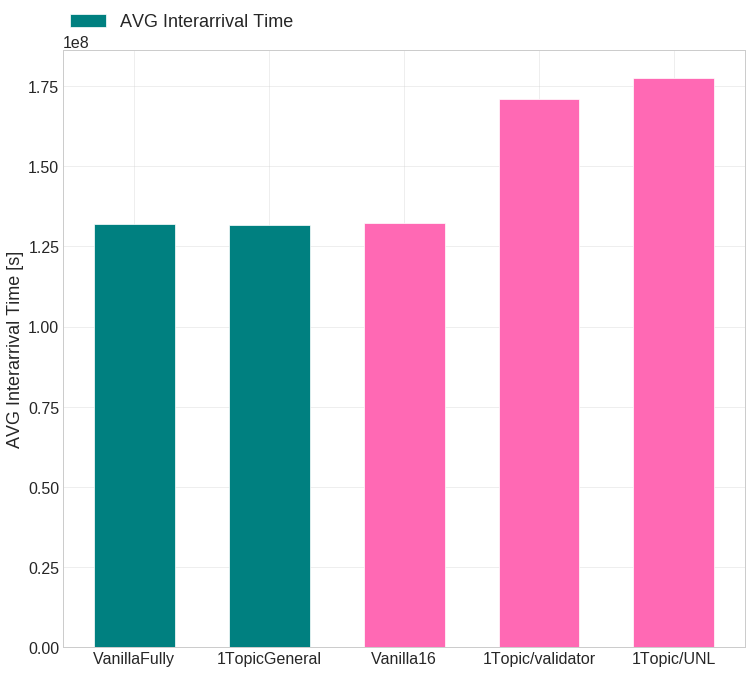

<Figure size 2880x2880 with 0 Axes>

In [27]:
# plot

 #Style configs
plt.style.use('seaborn-whitegrid')
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

fig, ax = plt.subplots(constrained_layout=False)
ax.grid(alpha=0.4)

fig.tight_layout()
fig.subplots_adjust(left=0.19, bottom=0.09, right=0.98, top=0.92, wspace=0.17, hspace=0.17)


l1 = ax.bar(avgDelta['type'], avgDelta['avg'], color=['teal', 'teal', 'hotpink', 'hotpink', 'hotpink'], align='center', width=0.6, edgecolor="white", linewidth=0.7, label="AVG Interarrival Time")#, color="teal")
# ax2 = ax.twinx()
# l2 = ax2.plot(avgDelta['type'], avgDelta['messages'], color="red", label="Messages Received")

ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                      ncol=1, mode="expand", borderaxespad=0.)
# ax2.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right',
#                       ncol=1, borderaxespad=0.)

ax.set_ylabel('AVG Interarrival Time [s]')
# ax2.set_ylabel('Number of Messages')

plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = 12, 10

plt.figure(figsize=(40, 40))

#Draw and save
plt.show()
fig.savefig('/home/flav/gossip/gossip_data/figures/avgInterArrival.pdf', format='pdf', facecolor='white', edgecolor='none', bbox_inches='tight')
fig.savefig('/home/flav/gossip/gossip_data/figures/avgInterArrival.png', format='png', facecolor='white', edgecolor='none', bbox_inches='tight')
fig.clf()


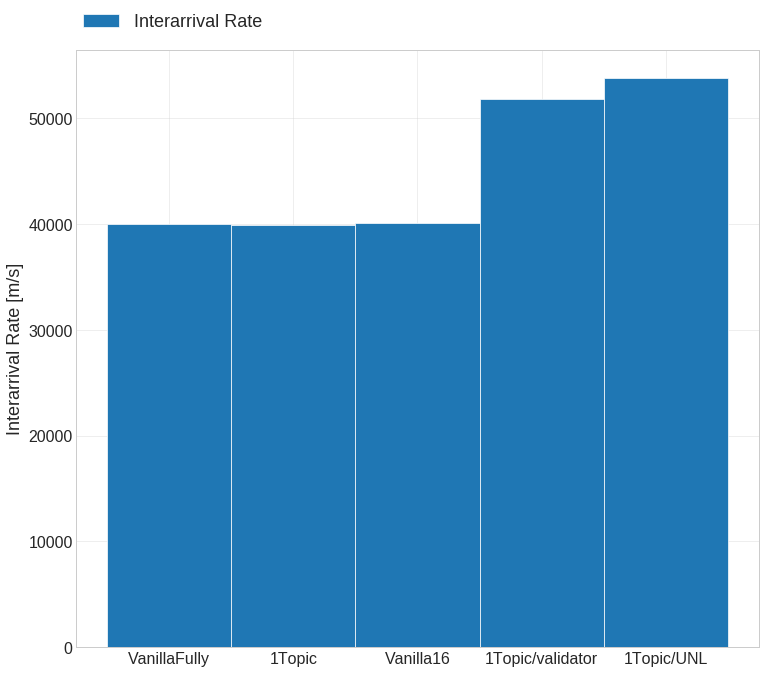

<Figure size 1440x1440 with 0 Axes>

In [17]:
# plot

 #Style configs
plt.style.use('seaborn-whitegrid')
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

fig, ax = plt.subplots(constrained_layout=False)
ax.grid(alpha=0.4)

fig.tight_layout()
fig.subplots_adjust(left=0.19, bottom=0.09, right=0.98, top=0.92, wspace=0.17, hspace=0.17)


l1 = ax.bar(avgDelta['type'], avgDelta['rate'], width=1, edgecolor="white", linewidth=0.7, label="Interarrival Rate")
# ax2 = ax.twinx()
# l2 = ax2.plot(avgDelta['type'], avgDelta['messages'], color="red", label="Messages Received")

ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                      ncol=1, mode="expand", borderaxespad=0.)
# ax2.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right',
#                       ncol=1, borderaxespad=0.)

ax.set_ylabel('Interarrival Rate [m/s]')
# ax2.set_ylabel('Number of Messages')

plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = 12, 10

plt.figure(figsize=(20, 20))

#Draw and save
plt.show()
fig.savefig('/home/flav/gossip/gossip_data/figures/InterArrivalRate.pdf', format='pdf', facecolor='white', edgecolor='none', bbox_inches='tight')
fig.savefig('/home/flav/gossip/gossip_data/figures/InterArrivalRate.png', format='png', facecolor='white', edgecolor='none', bbox_inches='tight')
fig.clf()
